# AI for social good 


In [26]:
#import all necessary dependencies 

import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_sql
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error




In [27]:
cnxn = pyodbc.connect('DRIVER={SQL Server};Server=10.2.60.26\\MSSQLSERVER01;PORT=1433;DATABASE=master;UID=ALX_Administrator;PWD=B1b9915')

In [28]:
# Analyse top service usage

df_claim_count = pd.read_sql("""SELECT TOP (20)
        pd.[DISCIPLINE_DESCRIPTION],
        COUNT(cp.[ClaimId]) AS ClaimCount
    FROM [DatathonDw2024].[dbo].[ProviderPractice] pp
    INNER JOIN [DatathonDw2024].[dbo].[ClaimsProviderPractice] cp
        ON pp.[PRACTICE_NO] = cp.[ProviderPracticeNo]
    INNER JOIN [DatathonDw2024].[dbo].[ProviderDisciplines_Ref] pd
        ON pp.[DISCIPLINE] = pd.[DISCIPLINE] AND pp.[SUB_DISCIPLINE] = pd.[SUB_DISCIPLINE]
    GROUP BY pd.[DISCIPLINE_DESCRIPTION], pd.[SUB_DISCIPLINE_DESCRIPTION]
    ORDER BY ClaimCount DESC;""", cnxn)

print(df_claim_count)

C:\Users\Administrator\AppData\Local\Temp\3\ipykernel_14792\3690309545.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_claim_count = pd.read_sql("""SELECT TOP (20)


              DISCIPLINE_DESCRIPTION  ClaimCount
0                       Pathologists   812557530
1                        Pharmacists   172380668
2                    Group Practices   116713126
3      General Medical Practitioners    58774202
4        Group Practices (Hospitals)    43321290
5            Diagnostic Radiologists    32483616
6      Radiotherapists / Oncologists    15882194
7       General Dental Practitioners    11255298
8                   Physiotherapists     8254604
9              Specialist Physicians     5216205
10                      Optometrists     3078115
11            Clinical Technologists     2978489
12                     Anaesthetists     2308078
13                      Orthopaedics     2307140
14                          Surgeons     2275164
15                    Paediatricians     2207017
16  Obstetricians and Gynaecologists     1786261
17                     Psychiatrists     1785803
18                        Dieticians     1765005
19                  

Insight: Focus on improving access and efficiency for high-demand services.



In [29]:
#Analyze Regional Disparities in Healthcare Access
#Query to find regions with the highest utilization rates:

pd.read_sql("""SELECT TOP (20)
    pp.[PHYS_TOWN] AS Region,
    COUNT(cp.[ClaimId]) AS ClaimCount
FROM [DatathonDw2024].[dbo].[ClaimsProviderPractice] cp
INNER JOIN [DatathonDw2024].[dbo].[ProviderPractice] pp
    ON cp.[ProviderPracticeNo] = pp.[PRACTICE_NO]
GROUP BY pp.[PHYS_TOWN]
ORDER BY ClaimCount DESC;""", cnxn)

C:\Users\Administrator\AppData\Local\Temp\3\ipykernel_14792\1937864913.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("""SELECT TOP (20)


,Region,ClaimCount
0,N1 CITY,294132557
1,JOHANNESBURG,142238233
2,CAPE TOWN,87311035
3,None,56368088
4,PRETORIA,53801936
5,ARCADIA,49678240
6,KEMPTON PARK,44871966
7,DURBAN,31085451
8,BISHOPSGATE,17991119
9,CENTURION,16948482


In [30]:
pd.read_csv('TOWN.csv.csv')


,Region,ClaimCount
0,N1 CITY,294132557
1,Johannesburg,142238233
2,CAPE TOWN,87311035
3,PRETORIA,53801936
4,ARCADIA,49678240
5,KEMPTON PARK,44871966
6,DURBAN,31085451
7,BISHOPSGATE,17991119
8,CENTURION,16948482
9,BELLVILLE,14137019


In [31]:
#Query to find regions with the lowest utilization rates:

pd.read_sql("""SELECT TOP (20)
    pp.[PHYS_TOWN] AS Region,
    COUNT(cp.[ClaimId]) AS ClaimCount
FROM [DatathonDw2024].[dbo].[ClaimsProviderPractice] cp
INNER JOIN [DatathonDw2024].[dbo].[ProviderPractice] pp
    ON cp.[ProviderPracticeNo] = pp.[PRACTICE_NO]
GROUP BY pp.[PHYS_TOWN]
ORDER BY ClaimCount ASC;""", cnxn)

C:\Users\Administrator\AppData\Local\Temp\3\ipykernel_14792\1591431942.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql("""SELECT TOP (20)


,Region,ClaimCount
0,JEFFREYSBAY,1
1,STRYDOM PARK,1
2,BRACKENDOWNS,2
3,Rylands Estate,2
4,LIFESTYLE ESTATE,2
5,PORT ELIZBETH,2
6,GA-NKOANA,2
7,KLEIN WINDHOEK,2
8,KWAZAKELE,2
9,HENTIES BAY,2


In [32]:
#Detect Seasonal Trends
#Query to find monthly trends in claims data:

trends = pd.read_sql("""SELECT 
    YEAR(cd.[ProcessDate]) AS Year,
    MONTH(cd.[ProcessDate]) AS Month,
    COUNT(cp.[ClaimId]) AS ClaimCount
FROM [DatathonDw2024].[dbo].[ClaimsProviderPractice] cp
INNER JOIN [DatathonDw2024].[dbo].[ClaimsDate] cd
    ON cp.[ClaimId] = cd.[ClaimId]
GROUP BY YEAR(cd.[ProcessDate]), MONTH(cd.[ProcessDate])
ORDER BY Year, Month;""", cnxn)

print(trends)

C:\Users\Administrator\AppData\Local\Temp\3\ipykernel_14792\50301451.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  trends = pd.read_sql("""SELECT


    Year  Month  ClaimCount
0   2023      1     7522954
1   2023      2     7329952
2   2023      3     8108958
3   2023      4     7095346
4   2023      5     8347847
5   2023      6     7513552
6   2023      7     7161282
7   2023      8     7551265
8   2023      9     6803211
9   2023     10     6960424
10  2023     11     6752254
11  2023     12     5918805
12  2024      1     8038267
13  2024      2     7890646
14  2024      3     7621241
15  2024      4     8127257
16  2024      5     8427760
17  2024      6     7068628
18  2024      7     7714228
19  2024      8     3873013


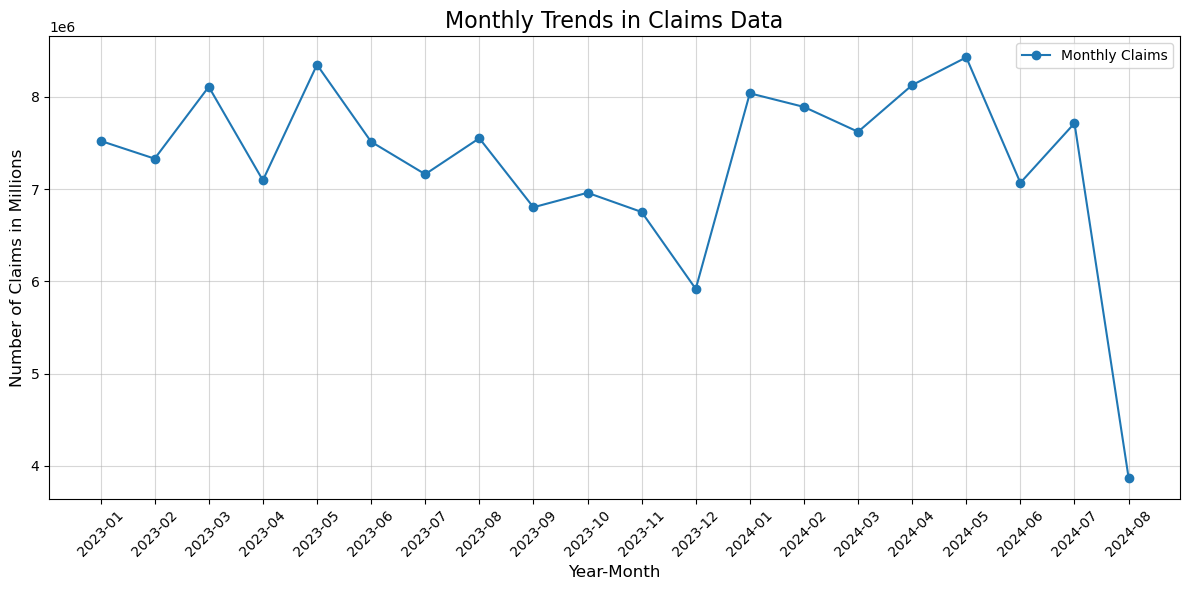

In [33]:


# Convert data to a pandas DataFrame
trends_df = pd.DataFrame(trends)

# Create a new column for Year-Month combination
trends_df['YearMonth'] = trends_df['Year'].astype(str) + '-' + trends_df['Month'].astype(str).str.zfill(2)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(trends_df['YearMonth'], trends_df['ClaimCount'], marker='o', label='Monthly Claims')

# Formatting the plot
plt.title('Monthly Trends in Claims Data', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Claims in Millions', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
# Analyse top most prevalient reasons claim

read_sql("""SELECT TOP 10
    icd.[CHAPTER_DESCRIPTION] AS CHAPTER_DESCRIP,
    icd.[WHO_FULL_DESC] AS WHO_FULL_DESC,
    COUNT(DISTINCT m.[ClaimId]) AS ClaimCount
FROM [DatathonDw2024].[dbo].[MedicationDiagnosis] md
INNER JOIN [DatathonDw2024].[dbo].[Icd10Codes_Ref] icd
    ON md.[Icd10CodeId] = icd.[Icd10CodeId]
INNER JOIN [DatathonDw2024].[dbo].[Medication] m
    ON md.[MedicineId] = m.[MedicineId]
GROUP BY icd.[CHAPTER_DESCRIPTION], icd.[WHO_FULL_DESC]
ORDER BY ClaimCount DESC;""", cnxn)

C:\Users\Administrator\AppData\Local\Temp\3\ipykernel_14792\1157748487.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  read_sql("""SELECT TOP 10


,CHAPTER_DESCRIP,WHO_FULL_DESC,ClaimCount
0,External causes of morbidity and mortality (V0...,Accidental poisoning by and exposure to pestic...,10514278
1,External causes of morbidity and mortality (V0...,"Bitten by rat, unspecified place, while engage...",4986844
2,Neoplasms (C00-D48),"Malignant neoplasm, head of pancreas",4783991
3,External causes of morbidity and mortality (V0...,"Explosion and rupture of pressurized tyre, pip...",3950794
4,Diseases of the eye and adnexa (H00-H59),Other disorders of cornea,3237188
5,Diseases of the respiratory system (J00-J99),Pneumonia in diseases classified elsewhere,2457409
6,"Injury, poisoning and certain other consequenc...",Injury of digital nerve of thumb,1894195
7,External causes of morbidity and mortality (V0...,Motorcycle rider injured in collision with hea...,1799376
8,External causes of morbidity and mortality (V0...,"Poisoning by and exposure to antiepileptic, se...",1476674
9,Diseases of the digestive system (K00-K93),Abrasion of teeth,1426184


In [35]:
#anylse month claim costs per month

claim_cost = pd.read_sql ("""SELECT 
    YEAR(cd.[ProcessDate]) AS Year,
    MONTH(cd.[ProcessDate]) AS Month,
    SUM(cc.[CostGross]) AS TotalClaimCost
FROM [DatathonDw2024].[dbo].[ClaimsProviderPractice] cp
INNER JOIN [DatathonDw2024].[dbo].[ClaimCost] cc
    ON cp.[ClaimId] = cc.[ClaimId]
INNER JOIN [DatathonDw2024].[dbo].[ClaimsDate] cd
    ON cp.[ClaimId] = cd.[ClaimId]
GROUP BY YEAR(cd.[ProcessDate]), MONTH(cd.[ProcessDate])
ORDER BY Year, Month;""", cnxn)

# Disable scientific notation in pandas
pd.options.display.float_format = '{:,.2f}'.format

print(claim_cost)

C:\Users\Administrator\AppData\Local\Temp\3\ipykernel_14792\2553827353.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  claim_cost = pd.read_sql ("""SELECT


    Year  Month     TotalClaimCost
0   2023      1 799,360,440,146.00
1   2023      2 824,282,055,452.00
2   2023      3 886,829,527,955.00
3   2023      4 734,869,882,510.00
4   2023      5 905,639,756,025.00
5   2023      6 822,736,637,535.00
6   2023      7 795,784,961,643.00
7   2023      8 841,061,907,846.00
8   2023      9 770,108,126,716.00
9   2023     10 808,972,713,548.00
10  2023     11 822,321,719,777.00
11  2023     12 665,492,014,066.00
12  2024      1 891,367,985,056.00
13  2024      2 938,932,225,312.00
14  2024      3 865,308,843,557.00
15  2024      4 917,571,872,438.00
16  2024      5 942,821,661,861.00
17  2024      6 821,025,493,089.00
18  2024      7 932,950,704,776.00
19  2024      8 452,269,791,513.00


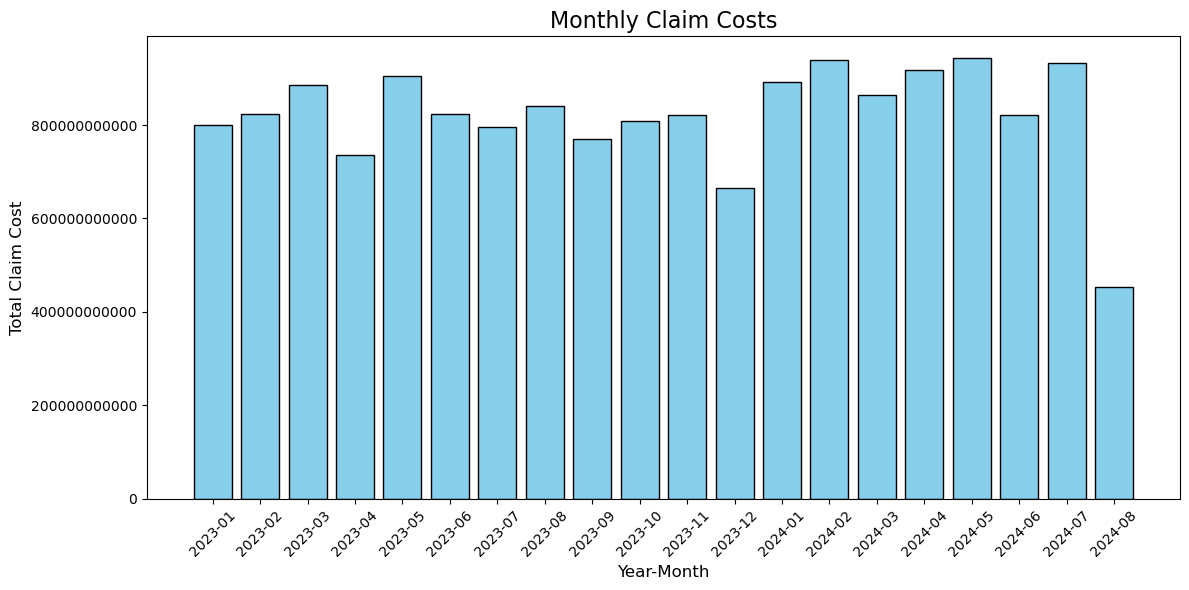

In [36]:
# Convert data to a pandas DataFrame
claim_cost = pd.DataFrame(claim_cost)

# Created a new column for Year-Month combination for readability
claim_cost['YearMonth'] = claim_cost['Year'].astype(str) + '-' + claim_cost['Month'].astype(str).str.zfill(2)

# Plotted the bar graph
plt.figure(figsize=(12, 6))
plt.bar(claim_cost['YearMonth'], claim_cost['TotalClaimCost'], color='skyblue', edgecolor='black')

# The plot
plt.title('Monthly Claim Costs', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Claim Cost', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.ticklabel_format(style='plain', axis='y')  # Disable scientific notation on y-axis
plt.tight_layout()

# Show the bar graph
plt.show()

# Gender base survival

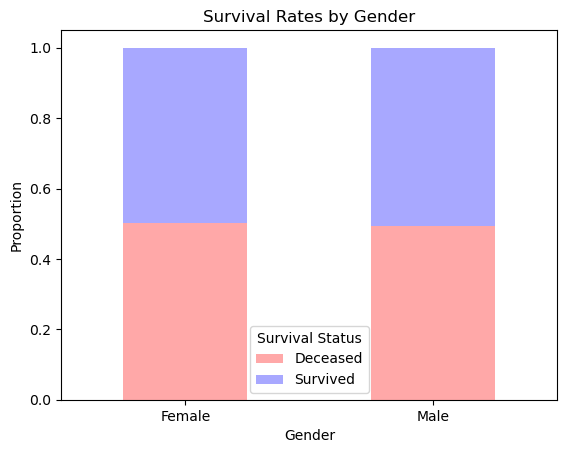

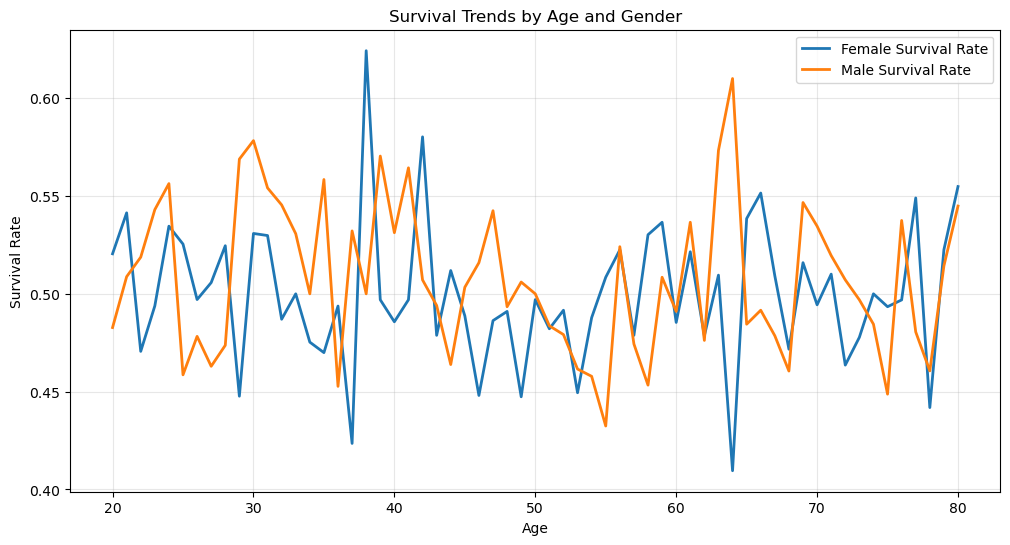

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('cancer_diagnosis_data.csv')

# Analyze survival trends by gender
gender_survival = data.groupby(['Gender', 'Survival_Status']).size().unstack()

# Calculate survival rates for each gender
gender_survival_rates = gender_survival.div(gender_survival.sum(axis=1), axis=0)

# Plot survival rates by gender
gender_survival_rates.plot(kind='bar', stacked=True, color=['#FF9999', '#9999FF'], alpha=0.85)
plt.title('Survival Rates by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Survival Status', labels=['Deceased', 'Survived'])
plt.show()

# Analyze trends over age (proxy for time) by gender
age_gender_survival = data.groupby(['Age', 'Gender', 'Survival_Status']).size().unstack().fillna(0)
age_gender_survival = age_gender_survival.div(age_gender_survival.sum(axis=1), axis=0)

# Plot trends over age for males and females
plt.figure(figsize=(12, 6))
for gender in data['Gender'].unique():
    subset = age_gender_survival.xs(gender, level='Gender')
    plt.plot(subset.index, subset['Survived'], label=f'{gender} Survival Rate', linewidth=2)
plt.title('Survival Trends by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Comparison of Data Models

In [38]:

# Simulating trends_df data for the model
np.random.seed(42)
date_range = pd.date_range(start="2018-01-01", end="2022-12-01", freq='MS')
claim_counts = np.random.randint(1, 10, size=len(date_range))

# Creating the DataFrame
trends_df = pd.DataFrame({
    "Year": date_range.year,
    "Month": date_range.month,
    "ClaimCount": claim_counts
})
trends_df['YearMonth'] = trends_df['Year'].astype(str) + '-' + trends_df['Month'].astype(str).str.zfill(2)
trends_df['Date'] = pd.to_datetime(trends_df['YearMonth'])
trends_df.set_index('Date', inplace=True)

# Features and target
X = trends_df[['Year', 'Month']]
y = trends_df['ClaimCount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print error metrics
mse, mae


(6.135689841096437, 2.2063835351403185)

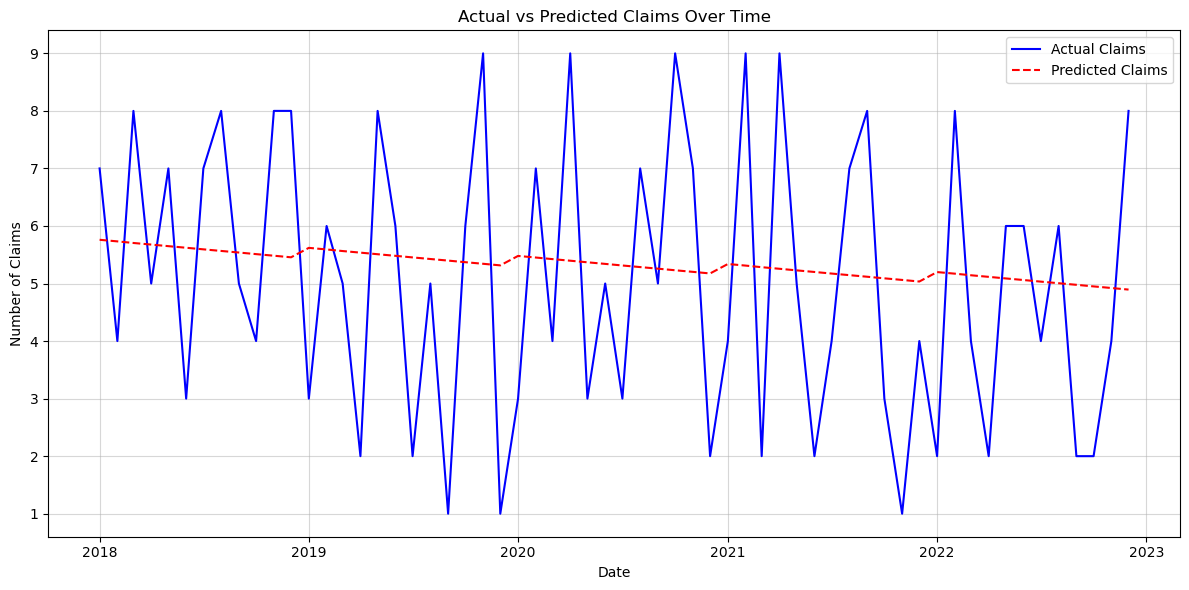

In [39]:
# Preparing forecast-like data for visualization (simulating predictions over the entire timeline)
forecast_df = trends_df.copy()
forecast_df['PredictedClaims'] = model.predict(X)

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(trends_df.index, trends_df['ClaimCount'], label='Actual Claims', color='blue')
plt.plot(forecast_df.index, forecast_df['PredictedClaims'], linestyle='--', label='Predicted Claims', color='red')
plt.title('Actual vs Predicted Claims Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Claims')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


prediction of medical aid cliams to have insights in resource allocation


Mean Squared Error: 8.99
Mean Absolute Error: 2.53


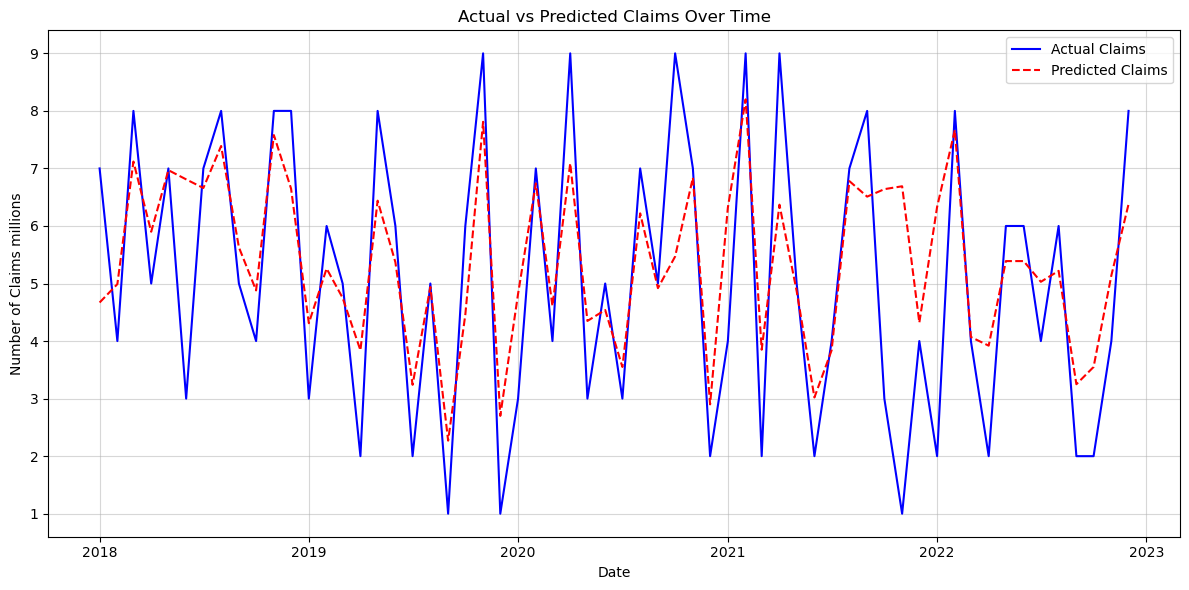

In [ ]:
#Random for model

# Simulating data
np.random.seed(42)
date_range = pd.date_range(start="2018-01-01", end="2022-12-01", freq='MS')
claim_counts = np.random.randint(1, 10, size=len(date_range))

# Creating the DataFrame
trends_df = pd.DataFrame({
    "Year": date_range.year,
    "Month": date_range.month,
    "ClaimCount": claim_counts
})
trends_df['YearMonth'] = trends_df['Year'].astype(str) + '-' + trends_df['Month'].astype(str).str.zfill(2)
trends_df['Date'] = pd.to_datetime(trends_df['YearMonth'])
trends_df.set_index('Date', inplace=True)

# Features and target
X = trends_df[['Year', 'Month']]
y = trends_df['ClaimCount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Simulate predictions over the entire timeline
forecast_df = trends_df.copy()
forecast_df['PredictedClaims'] = model.predict(X)

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(trends_df.index, trends_df['ClaimCount'], label='Actual Claims', color='blue')
plt.plot(forecast_df.index, forecast_df['PredictedClaims'], linestyle='--', label='Predicted Claims', color='red')
plt.title('Actual vs Predicted Claims Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Claims millions')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


Mean Squared Error: 8.99
Mean Absolute Error: 2.53


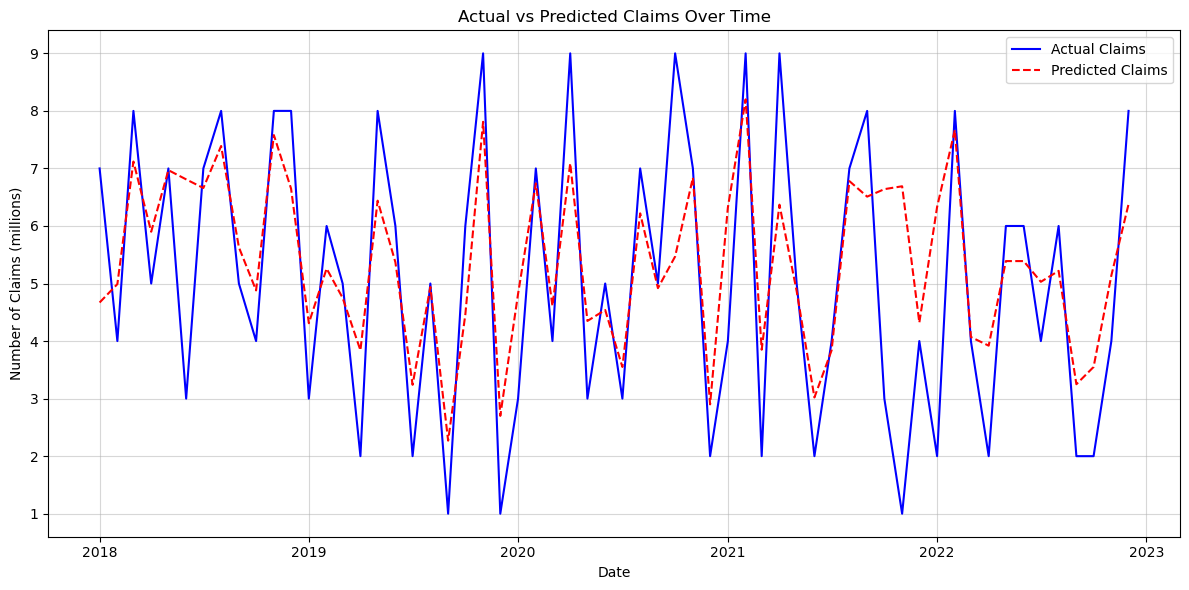

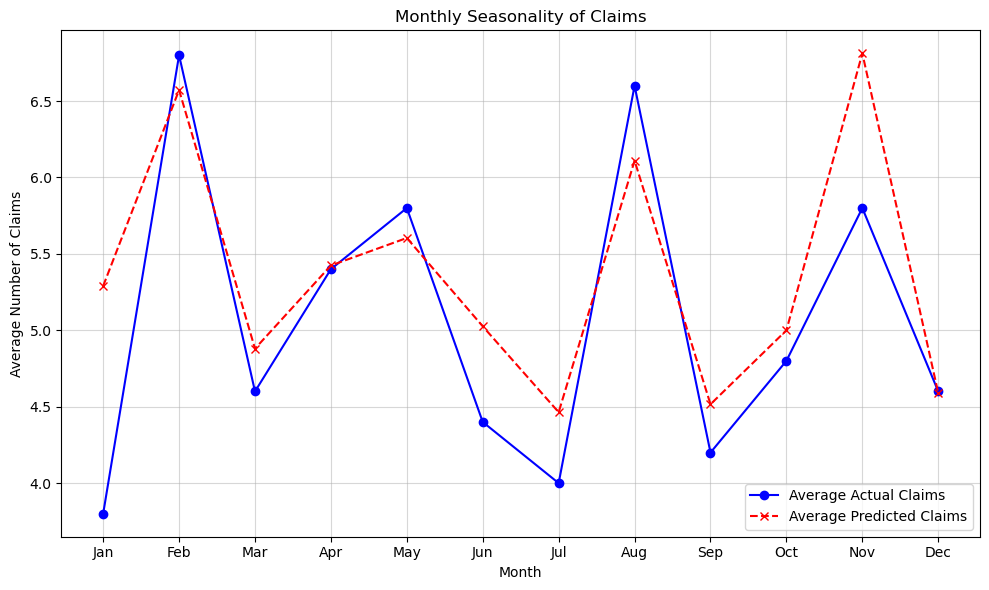

In [50]:

#Random frorest

# Simulating data
np.random.seed(42)
date_range = pd.date_range(start="2018-01-01", end="2022-12-01", freq='MS')
claim_counts = np.random.randint(1, 10, size=len(date_range))  # Simulate seasonal claim count data

# Creating the DataFrame
trends_df = pd.DataFrame({
    "Year": date_range.year,
    "Month": date_range.month,
    "ClaimCount": claim_counts
})
trends_df['YearMonth'] = trends_df['Year'].astype(str) + '-' + trends_df['Month'].astype(str).str.zfill(2)
trends_df['Date'] = pd.to_datetime(trends_df['YearMonth'])
trends_df.set_index('Date', inplace=True)

# Features and target
X = trends_df[['Year', 'Month']]
y = trends_df['ClaimCount']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Error metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print error metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

# Simulate predictions over the entire timeline
forecast_df = trends_df.copy()
forecast_df['PredictedClaims'] = model.predict(X)

# Plotting the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(trends_df.index, trends_df['ClaimCount'], label='Actual Claims', color='blue')
plt.plot(forecast_df.index, forecast_df['PredictedClaims'], linestyle='--', label='Predicted Claims', color='red')
plt.title('Actual vs Predicted Claims Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Claims (millions)')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

# Monthly trend analysis
monthly_trend = forecast_df.groupby('Month')[['ClaimCount', 'PredictedClaims']].mean()

# Plot monthly seasonality
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend.index, monthly_trend['ClaimCount'], marker='o', label='Average Actual Claims', color='blue')
plt.plot(monthly_trend.index, monthly_trend['PredictedClaims'], marker='x', linestyle='--', label='Average Predicted Claims', color='red')
plt.title('Monthly Seasonality of Claims')
plt.xlabel('Month')
plt.ylabel('Average Number of Claims')
plt.xticks(ticks=range(1, 13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


Linear regression model

Mean Squared Error: 0.02
Mean Absolute Error: 0.13
Mean Squared Error: 0.01
Mean Absolute Error: 0.12


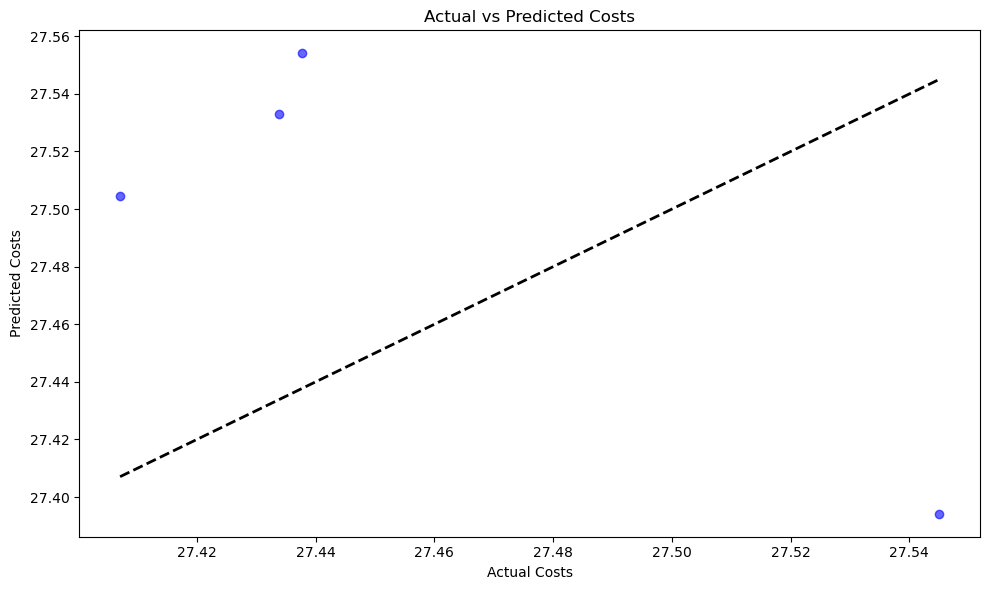

In [42]:

claim_cost['Year'] = pd.to_datetime(claim_cost['YearMonth']).dt.year
claim_cost['Month'] = pd.to_datetime(claim_cost['YearMonth']).dt.month

claim_cost['LogTotalClaimCost'] = np.log1p(claim_cost['TotalClaimCost'])
from sklearn.model_selection import train_test_split

X = claim_cost[['Year', 'Month']]
y = claim_cost['LogTotalClaimCost']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

from sklearn.ensemble import GradientBoostingRegressor

# Initialize the model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predictions
y_pred = gb_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black', linewidth=2)
plt.title("Actual vs Predicted Costs")
plt.xlabel("Actual Costs")
plt.ylabel("Predicted Costs")
plt.tight_layout()
plt.show()


# Cancer Analysis from Electronic Hospital Records

In [43]:
import pandas as pd

# Load the uploaded file to check its content and structure.
file_path = 'cancer_diagnosis_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure.
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             20000 non-null  object 
 1   Age                    20000 non-null  int64  
 2   Gender                 20000 non-null  object 
 3   Tumor_Size(cm)         20000 non-null  float64
 4   Tumor_Type             20000 non-null  object 
 5   Biopsy_Result          20000 non-null  object 
 6   Treatment              20000 non-null  object 
 7   Response_to_Treatment  20000 non-null  object 
 8   Survival_Status        20000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 1.4+ MB


(                             Patient_ID  Age  Gender  Tumor_Size(cm)  \
 0  c044501a-43ca-4a0c-8b8b-991439ba1b6a   52  Female            5.08   
 1  b8900c4c-1232-4084-9432-5d02eba74d20   32  Female            0.80   
 2  3004e2bc-8037-49cb-a542-d5612b73beab   70  Female            9.56   
 3  1df86af7-6745-4dea-b127-cbc9915079fc   21  Female            3.07   
 4  128e00c3-72e3-4031-a7f4-1165d7199cce   62    Male            7.17   
 
   Tumor_Type Biopsy_Result          Treatment Response_to_Treatment  \
 0     Benign      Positive            Surgery           No Response   
 1     Benign      Negative            Surgery     Complete Response   
 2     Benign      Positive  Radiation Therapy     Complete Response   
 3  Malignant      Negative            Surgery      Partial Response   
 4  Malignant      Positive  Radiation Therapy     Complete Response   
 
   Survival_Status  
 0        Survived  
 1        Survived  
 2        Deceased  
 3        Survived  
 4        Deceased  ,

# Summary of EDA:
# Numerical Features:
The age range is 20–80 years, with a mean of approximately 50. Tumor sizes range from 0.5 cm to 10 cm, with a mean of ~5.25 cm.

# Categorical Features:
The survival trends vary significantly with tumor type and treatment, as seen in the plots: Malignant tumors are associated with higher mortality compared to benign ones. The type of treatment also shows variations in survival rates.

# Data Completeness:
No missing values were found.

Models¶

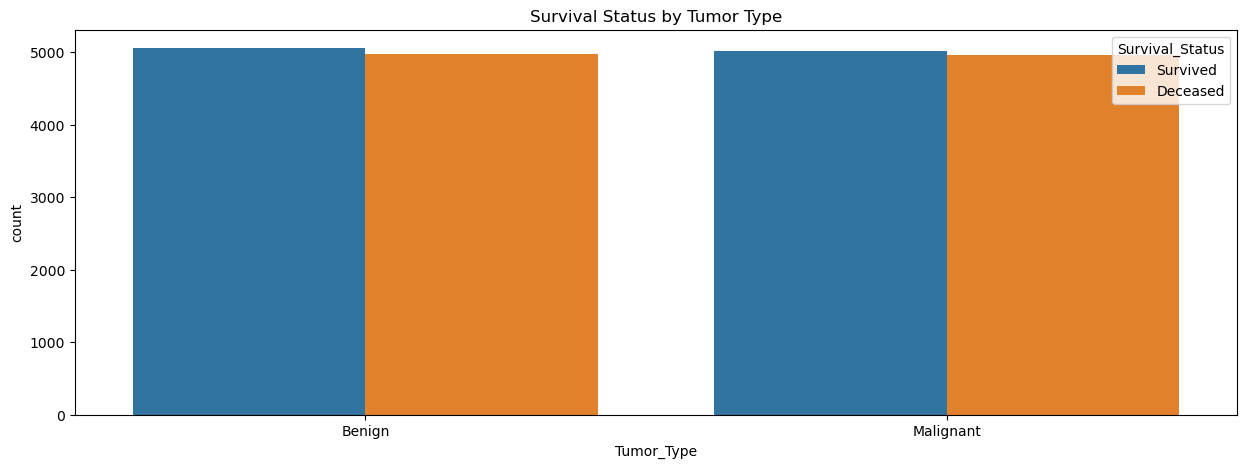

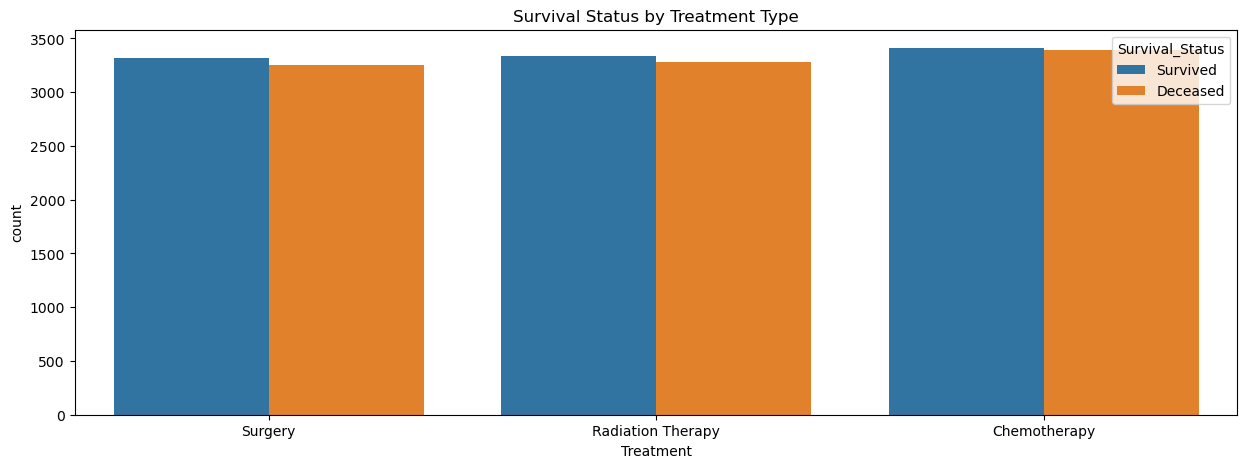

(            Age  Tumor_Size(cm)
 count 20,000.00       20,000.00
 mean      49.96            5.25
 std       17.51            2.74
 min       20.00            0.50
 25%       35.00            2.89
 50%       50.00            5.26
 75%       65.00            7.59
 max       80.00           10.00,
 Patient_ID               0
 Age                      0
 Gender                   0
 Tumor_Size(cm)           0
 Tumor_Type               0
 Biopsy_Result            0
 Treatment                0
 Response_to_Treatment    0
 Survival_Status          0
 dtype: int64)

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Summary statistics for numerical columns
summary_stats = data.describe()

# Check for missing values
missing_values = data.isnull().sum()

# Encode categorical variables for analysis
categorical_columns = ['Gender', 'Tumor_Type', 'Biopsy_Result', 'Treatment', 'Response_to_Treatment', 'Survival_Status']
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Plot survival trends by tumor type and treatment
plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='Tumor_Type', hue='Survival_Status')
plt.title('Survival Status by Tumor Type')
plt.show()

plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='Treatment', hue='Survival_Status')
plt.title('Survival Status by Treatment Type')
plt.show()

summary_stats, missing_values


# Predictive Model Performance:

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define features and target variable
X = encoded_data.drop(columns=['Patient_ID', 'Survival_Status_Survived'])
y = encoded_data['Survival_Status_Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, conf_matrix


(0.482,
 '              precision    recall  f1-score   support\n\n       False       0.48      0.49      0.48      1987\n        True       0.49      0.48      0.48      2013\n\n    accuracy                           0.48      4000\n   macro avg       0.48      0.48      0.48      4000\nweighted avg       0.48      0.48      0.48      4000\n',
 array([[ 967, 1020],
        [1052,  961]], dtype=int64))

# Analysis using Random forest model to check key drivers for survival

C:\Users\Administrator\AppData\Local\Temp\3\ipykernel_14792\1560026252.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', palette='viridis')


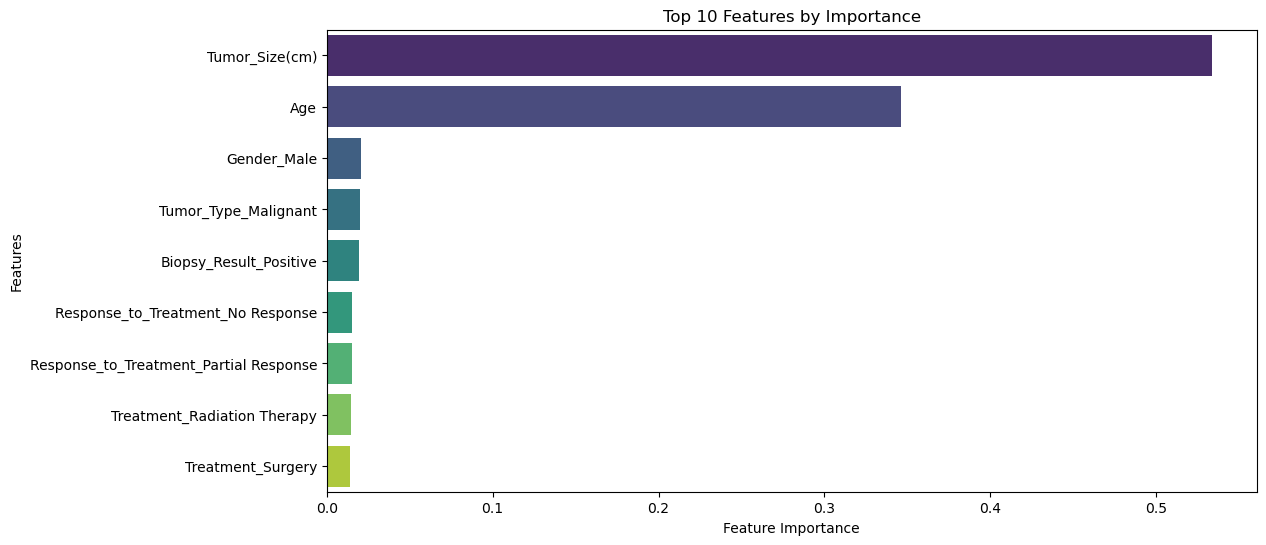

(                                  Feature  Importance
 1                          Tumor_Size(cm)        0.53
 0                                     Age        0.35
 2                             Gender_Male        0.02
 3                    Tumor_Type_Malignant        0.02
 4                  Biopsy_Result_Positive        0.02
 7       Response_to_Treatment_No Response        0.02
 8  Response_to_Treatment_Partial Response        0.02
 5             Treatment_Radiation Therapy        0.01
 6                       Treatment_Surgery        0.01,
 Survival_Status_Survived
 True    50.33
 False   49.66
 Name: proportion, dtype: float64)

In [46]:
# Extract feature importances from the Random Forest model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot the top features by importance
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importances.head(10), x='Importance', y='Feature', palette='viridis')
plt.title('Top 10 Features by Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# Class distribution
class_distribution = y.value_counts(normalize=True) * 100

feature_importances, class_distribution

# Predict survival
# Trends and key drivers of survival

C:\Users\Administrator\AppData\Local\Temp\3\ipykernel_14792\2779465647.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gb_feature_importances.head(10), x='Importance', y='Feature', palette='coolwarm')


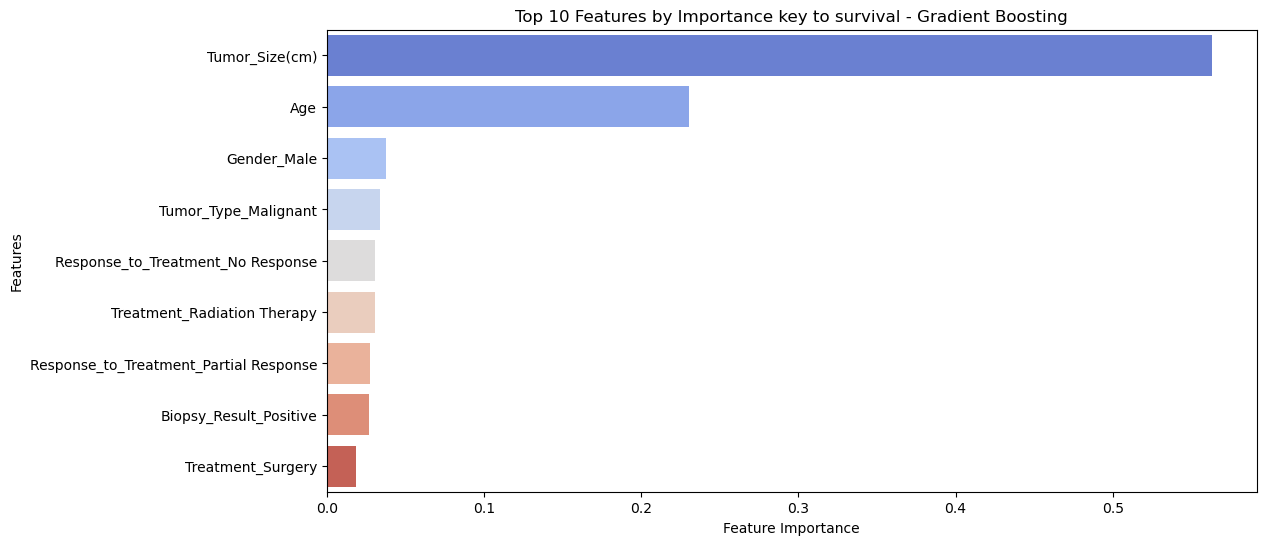

(0.49825,
 '              precision    recall  f1-score   support\n\n       False       0.49      0.48      0.49      1987\n        True       0.50      0.52      0.51      2013\n\n    accuracy                           0.50      4000\n   macro avg       0.50      0.50      0.50      4000\nweighted avg       0.50      0.50      0.50      4000\n',
 array([[ 954, 1033],
        [ 974, 1039]], dtype=int64))

In [47]:
# Reinitialize and ensure the dataset is correctly prepared for Gradient Boosting

# Train a Gradient Boosting model using the same dataset
from sklearn.ensemble import GradientBoostingClassifier


gb_model = GradientBoostingClassifier(random_state=42, n_estimators=200, learning_rate=0.1)
gb_model.fit(X_train, y_train)

# Predict and evaluate the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Analyze feature importance
gb_feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualize top 10 features by importance
plt.figure(figsize=(12, 6))
sns.barplot(data=gb_feature_importances.head(10), x='Importance', y='Feature', palette='coolwarm')
plt.title('Top 10 Features by Importance key to survival - Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

accuracy_gb, classification_report_gb, confusion_matrix_gb

# Models NLP Analysis

In [48]:
# Check for any textual columns suitable for NLP
text_columns = data.select_dtypes(include='object').columns

# Display unique values in potential text-based columns to identify feedback or qualitative data
text_column_samples = {col: data[col].unique()[:10] for col in text_columns}

text_columns, text_column_samples

(Index(['Patient_ID', 'Gender', 'Tumor_Type', 'Biopsy_Result', 'Treatment',
        'Response_to_Treatment', 'Survival_Status'],
       dtype='object'),
 {'Patient_ID': array(['c044501a-43ca-4a0c-8b8b-991439ba1b6a',
         'b8900c4c-1232-4084-9432-5d02eba74d20',
         '3004e2bc-8037-49cb-a542-d5612b73beab',
         '1df86af7-6745-4dea-b127-cbc9915079fc',
         '128e00c3-72e3-4031-a7f4-1165d7199cce',
         '2b3cc8d5-f2f7-4ce2-be51-f5f489b53244',
         '2f8c5926-bedb-418e-84ed-8b05412e495f',
         '315f3ae6-b44c-42a8-9ce3-deb728a662f9',
         '494e30bf-b2e5-46b1-8323-ec4b1ef6ff1b',
         'b55064cc-82e5-4d22-801a-32c2a9106a44'], dtype=object),
  'Gender': array(['Female', 'Male'], dtype=object),
  'Tumor_Type': array(['Benign', 'Malignant'], dtype=object),
  'Biopsy_Result': array(['Positive', 'Negative'], dtype=object),
  'Treatment': array(['Surgery', 'Radiation Therapy', 'Chemotherapy'], dtype=object),
  'Response_to_Treatment': array(['No Response', 'Complete R